In [1]:
import numpy as np
import jax.numpy as jnp
import jax.random as jrandom
import random
from numba import njit, jit


In [15]:


@njit
def n_g(N, M):
#    print(N)
    for n in range(N):
        np.random.standard_normal(M)
#        for m in range(M):
#            np.random.normal()
#    print(n)
    return N * M

In [59]:
M = 10
N = 10000000

In [60]:
%%time
n_g(N,M)

CPU times: user 4.73 s, sys: 12.1 ms, total: 4.74 s
Wall time: 4.72 s


100000000

In [48]:
def n_n(N, M, K):
#    print(N)
    for n in range(int(N/K)):
        np.random.standard_normal(M*K)
#        for m in range(M):
#            np.random.normal()
#    print(n)
    return N * M

In [62]:
%%time
n_n(N,M,10)

CPU times: user 4.41 s, sys: 0 ns, total: 4.41 s
Wall time: 4.42 s


100000000

In [13]:
from joblib import Parallel, delayed

In [50]:
%%time
res = Parallel(n_jobs=4)(delayed(n_g)(N/4,M) for i in range(4))
np.sum(res)

CPU times: user 21.9 ms, sys: 23.9 ms, total: 45.8 ms
Wall time: 7.51 s


500000000.0

In [53]:
%%time
res = Parallel(n_jobs=4)(delayed(n_n)(N/4,M,10) for i in range(4))
np.sum(res)

CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 45.3 s


5000000000.0

In [55]:
(1e6 * 5000) * 8 / 1000 / 1000 / 1000

40.0

In [19]:
def pi(npoints): 
  n_in_circle = 0 
  for i in range(npoints):
    x = random.random()
    y = random.random()
    if (x**2+y**2 < 1):
      n_in_circle += 1
  return 4*n_in_circle / npoints

@jit(nopython=True, parallel=True)
def nb_pi(npoints): 
    rng = np.random
    n_in_circle = 0 
    for i in range(npoints):
        x = rng.random()
        y = rng.random()    
        if (x**2+y**2 < 1):
            n_in_circle += 1
    return 4*n_in_circle / npoints

def np_pi(npoints): 
    rng = np.random
    x = rng.random(npoints)
    y = rng.random(npoints)
    n_in_circle =  np.sum(x**2 + y**2 < 1)
    return 4*n_in_circle / npoints

In [3]:
%%time
pi(1000000)

CPU times: user 336 ms, sys: 0 ns, total: 336 ms
Wall time: 336 ms


3.141568

In [20]:
%timeit nb_pi(int(1e6))

/home/youngsuklee/miniconda3/envs/anylox/lib/python3.7/site-packages/numba/core/typed_passes.py:316: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-19-893bb5deb967>", line 11:
@jit(nopython=True, parallel=True)
def nb_pi(npoints): 
^

  state.func_ir.loc))


8.69 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit np_pi(int(1e6))

20.6 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
import numpy as np
import numba
import time as time

@numba.vectorize(["float64(float64,float64)"],
    nopython=True,target='parallel')
def add2_par(x, y):
    return x + 2 * y
n = np.array( int(4e8))# number of data points

X = np.ones(n, dtype=np.float)
Y = np.ones(n, dtype=np.float)
t0 = time.time()
add2_par(X, Y, out=X)
t1 = time.time()
run_time = t1 - t0

In [39]:
from numpy.random import PCG64, Philox
from numpy.random import MT19937, SFC64


my_prng = PCG64

rng = my_prng(12345)
arng = []
for i in range(10000):
    arng.append(rng.jumped(100*i))

In [75]:
for i in range(int(1e6)):
    rng.jumped()
    #rng.random_raw()

In [68]:
rng = np.random.PCG64(12345)

random_raw = rng.cffi.next_double
@njit
def nb_rdn(rng, npoints): 
    for i in range(npoints):
        x = random_raw(())
    return x

ImportError: cffi cannot be imported.

In [2]:
np.__version__

'1.19.4'

In [9]:
normal_d = bit_gen.cffi

In [10]:
normal_d

interface(state_address=139810605703928, state=<cdata 'void *' 0x7f28317d22f8>, next_uint64=<cdata 'uint64_t(*)(void *)' 0x7f2845df3b30>, next_uint32=<cdata 'uint32_t(*)(void *)' 0x7f2845df3b80>, next_double=<cdata 'double(*)(void *)' 0x7f2845df3c00>, bit_generator=<cdata 'void *' 0x7f28317d22b0>)

In [24]:
rg.random()

0.38357707923711737

In [29]:
import numpy as np
import numba as nb

from numpy.random import PCG64
from timeit import timeit

bit_gen = PCG64(0)
next_d = bit_gen.cffi.next_double
state_addr = bit_gen.cffi.state_address
print(state_addr)

def normals(n, state):
    out = np.empty(n)
    for i in range((n + 1) // 2):
        x1 = 2.0 * next_d(state) - 1.0
        x2 = 2.0 * next_d(state) - 1.0
        r2 = x1 * x1 + x2 * x2
        while r2 >= 1.0 or r2 == 0.0:
            x1 = 2.0 * next_d(state) - 1.0
            x2 = 2.0 * next_d(state) - 1.0
            r2 = x1 * x1 + x2 * x2
        f = np.sqrt(-2.0 * np.log(r2) / r2)
        out[2 * i] = f * x1
        if 2 * i + 1 < n:
            out[2 * i + 1] = f * x2
    return out

# Compile using Numba
normalsj = nb.jit(normals, nopython=True)
# Must use state address not state with numba
n = 1000

def numbacall():
    return normalsj(n, state_addr)

bit_gen = PCG64(0)
next_d = bit_gen.cffi.next_double
state_addr = bit_gen.cffi.state_address
print(state_addr)
rg = np.random.Generator(bit_gen)

def numpycall():
    return rg.normal(size=n)

# Check that the functions work
r1 = numbacall()
r2 = numpycall()
assert r1.shape == (n,)
assert r1.shape == r2.shape

t1 = timeit(numbacall, number=1000)
print('{:.2f} secs for {} PCG64 (Numba/PCG64) gaussian randoms'.format(t1, n))
t2 = timeit(numpycall, number=1000)
print('{:.2f} secs for {} PCG64 (NumPy/PCG64) gaussian randoms'.format(t2, n))


139810588200888
139810588198584
0.03 secs for 1000 PCG64 (Numba/PCG64) gaussian randoms
0.02 secs for 1000 PCG64 (NumPy/PCG64) gaussian randoms


In [23]:
r1 - r2

array([-4.50465827e-01,  1.02473204e+00, -2.80693788e+00, -1.79587254e-01,
       -4.92919248e-01,  3.13775837e-01, -1.03682509e+00, -1.63472450e+00,
        1.71672300e+00,  2.81362980e+00,  1.47096999e+00,  1.33660208e+00,
        9.08153048e-01,  9.63470750e-01, -1.83168253e+00,  1.13834580e-01,
        1.11538911e+00,  8.28096685e-01, -3.48700487e+00, -7.00669288e-01,
       -3.77617534e-01, -1.63757129e+00, -2.26554847e-01, -4.85773025e-01,
       -2.71114457e+00,  1.40435191e+00, -5.58415885e-01,  1.23407342e+00,
        5.02217470e-01, -1.27989469e+00, -1.88371287e+00, -2.35610185e+00,
       -9.22492302e-01, -7.56520590e-01,  1.26581216e+00, -9.37733157e-01,
       -1.59759248e+00, -2.44798034e-01,  1.38395762e+00,  1.53889618e+00,
        2.19527591e+00, -2.11626401e+00, -2.38492754e-01, -2.26771772e-02,
       -9.64440437e-01, -5.70917074e-01,  1.62144780e+00, -1.89889584e+00,
        5.14434124e-01,  7.87758012e-01, -2.79449808e+00,  4.71994494e-01,
        2.72620920e-01,  

In [15]:
"""
Use cffi to access any of the underlying C functions from distributions.h
"""
import os
import numpy as np
import cffi
from parse import parse_distributions_h
ffi = cffi.FFI()

inc_dir = os.path.join(np.get_include(), 'numpy')

# Basic numpy types
ffi.cdef('''
    typedef intptr_t npy_intp;
    typedef unsigned char npy_bool;

''')

parse_distributions_h(ffi, inc_dir)


In [16]:
# Compare the distributions.h random_standard_normal_fill to
# Generator.standard_random
bit_gen = np.random.PCG64()
rng = np.random.Generator(bit_gen)
state = bit_gen.state

interface = rng.bit_generator.cffi
n = 100
vals_cffi = ffi.new('double[%d]' % n)
lib.random_standard_normal_fill(interface.bit_generator, n, vals_cffi)

# reset the state
bit_gen.state = state

vals = rng.standard_normal(n)

for i in range(n):
    assert vals[i] == vals_cffi[i]

NameError: name 'lib' is not defined

In [40]:
rng.advance(10)
x1 = rng.random_raw(10)
rng.advance(10)
x2 = rng.random_raw(10)

In [13]:
import os
os.chdir(r'/home/youngsuklee/miniconda3/envs/anylox/lib/python3.7/site-packages/numpy/random/_examples/cffi')

In [42]:
x2

array([15767205159062325291, 11097953074831285814, 17192150777551482312,
       13369856277459365757, 15874369914247664521, 17143256583683730517,
       10075353526182968513, 17297013095226821983,  9130915850206751578,
        5050223831637780581], dtype=uint64)

In [26]:
njumps = int(1e7)
N = 2**128

In [27]:
x = np.mod(np.arange(0, njumps) * (gr - 1) * N, N)
x = np.sort(x)

In [29]:
np.diff(x).min()

1.6499264843595548e+31

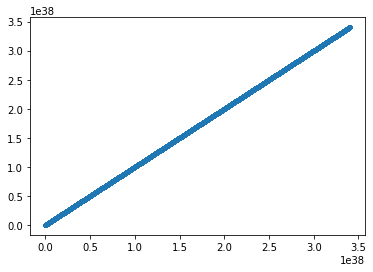

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x, x, '.')
plt.show()

In [18]:
x

array([0.0, 2.103060685294029e+38, 4.206121370588058e+38, ...,
       2.103054376111973e+44, 2.1030564791726583e+44,
       2.1030585822333436e+44], dtype=object)

In [6]:
rng.state

{'bit_generator': 'PCG64',
 'state': {'state': 33261208707367790463622745601869196757,
  'inc': 268209174141567072605526753992732310247},
 'has_uint32': 0,
 'uinteger': 0}

In [10]:
from numpy.random import SeedSequence, default_rng

ss = SeedSequence(12345)

# Spawn off 10 child SeedSequences to pass to child processes.
child_seeds = ss.spawn(10)
streams = [default_rng(s) for s in child_seeds]

In [11]:
child_seeds

[SeedSequence(
     entropy=12345,
     spawn_key=(0,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(1,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(2,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(3,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(4,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(5,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(6,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(7,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(8,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(9,),
 )]

In [4]:
file = r'/mnt/c/Users/youngsuk/Downloads/iShares-Listed-Private-Equity-UCITS-ETF-USD-Dist_fund.xls'

In [ ]:
f = open(file, 'r')
f.write()

In [7]:
subprocess.run(['ls', '-l'])

CompletedProcess(args=['ls', '-l'], returncode=0)

In [3]:
subprocess.run(['python', '--version'])

CompletedProcess(args=['python', '--version'], returncode=0)

In [9]:
subprocess.run(['python', r'/home/youngsuk/repos/fortyfive/py_ufo/drops/test1.py'], capture_output=True)

CompletedProcess(args=['python', '/home/youngsuk/repos/fortyfive/py_ufo/drops/test1.py'], returncode=0, stdout=b'this is test\n', stderr=b'')

In [10]:
os.getcwd()

'/home/youngsuk/repos/fortyfive/notebooks'

In [11]:
os.getlogin()

'youngsuk'

In [12]:
os.getpid()

19514

In [13]:
import pathlib

In [14]:
pathlib.Path.home()

PosixPath('/home/youngsuk')

In [1]:
import pandas as pd

In [8]:
table=pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory')

In [17]:
df = table[3]
df

,Date,Country or territory
0,1 December,China
1,13 January,Thailand
2,16 January,Japan
3,20 January,South Korea • United States
4,21 January,Taiwan[a]
...,...,...
59,11 April,Saba[n]
60,16 April,Bonaire[n]
61,30 April,Comoros • Tajikistan
62,6 May,South Ossetia[a]


In [12]:
df

Location[a]  \
                                    Unnamed: 0_level_1   
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
226                                                NaN   
227                                                NaN   
228                                                NaN   
229  As of 20 August 2020 (UTC) · History of cases ...   
230  Notes ^ Location: Countries, territories, and ...   

                                                        \
                                              World[e]   
0                                     United States[f]   
1                                            Brazil[g]   
2                                                India   
3                                            Russia[h]   
4                                         South Africa   
..                                                 ...   
226                                           Anguilla   
227                                     Sint Eustatius   
228                                       Tanzania[bd]   
229  As of 20 August 2020 (UTC) · History of cases ...   
230  Notes ^ Location: Countries, territories, and ...   

                                              Cases[b]  \
                                            22,589,017   
0                                              5605858   
1                                              3501975   
2                                              2905823   
3                                               946976   
4                                               599940   
..                                                 ...   
226                                                  3   
227                                                  2   
228                                            No data   
229  As of 20 August 2020 (UTC) · History of cases ...   
230  Notes ^ Location: Countries, territories, and ...   

                                             Deaths[c]  \
                                               792,475   
0                                               174963   
1                                               112304   
2                                                54849   
3                                                16189   
4                                                12618   
..                                                 ...   
226                                                  0   
227                                                  0   
228                                            No data   
229  As of 20 August 2020 (UTC) · History of cases ...   
230  Notes ^ Location: Countries, territories, and ...   

                                             Recov.[d]  \
                                            14,457,309   
0                                              2852221   
1                                              2653407   
2                                              2158946   
3                                               761330   
4                                               497169   
..                                                 ...   
226                                                  3   
227                                                  2   
228                                            No data   
229  As of 20 August 2020 (UTC) · History of cases ...   
230  Notes ^ Location: Countries, territories, and ...   

                                                  Ref.  
                                                   [4]  
0                                                 [13]  
1                                             [17][18]  
2                                       

In [6]:
table[1]

Date  Added                               Removed  \
                 Date Ticker                      Security  Ticker   
0       June 22, 2020    BIO          Bio-Rad Laboratories     ADS   
1       June 22, 2020    TDY         Teledyne Technologies     HOG   
2       June 22, 2020    TYL            Tyler Technologies     JWN   
3        May 22, 2020    WST  West Pharmaceutical Services      HP   
4        May 12, 2020    DPZ                Domino's Pizza    CPRI   
..                ...    ...                           ...     ...   
244  December 5, 2000    SBL           Symbol Technologies      OI   
245  December 5, 2000    AYE              Allegheny Energy     GRA   
246  December 5, 2000    ABK               Ambac Financial     CCK   
247     July 27, 2000   JDSU                  JDS Uniphase     RAD   
248  December 7, 1999   YHOO                        Yahoo!     LDW   

                                                      Reason  
                  Security                            Reason  
0    Alliance Data Systems  Market capitalization change.[6]  
1          Harley-Davidson  Market capitalization change.[6]  
2                Nordstrom  Market capitalization change.[6]  
3        Helmerich & Payne  Market capitalization change.[7]  
4           Capri Holdings  Market capitalization change.[8]  
..                     ...                               ...  
244         Owens-Illinois               Market Cap changes.  
245             W.R. Grace               Market Cap changes.  
246         Crown Holdings               Market Cap changes.  
247                RiteAid           Market Cap change.[202]  
248                Laidlaw           Market Cap change.[203]  

[249 rows x 6 columns]